<a href="https://colab.research.google.com/github/ReneStander/BMG_Python_Course/blob/main/BMG_Python_Workshop_Data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python workshop

**Dr Rene Stander**

**16 September 2024**

*Sources:*
*   Downey, AB., 2012. Think Python, O'Reilly Media, Inc. (https://allendowney.github.io/ThinkPython/)
*   Adhikari, A., DeNero, J. and Wagner, D., 2022. Computational and Inferential Thinking: The Foundations of Data Science, Second edition, University of California, Berkeley. (https://inferentialthinking.com/chapters/intro.html)

# Data manipulation

In this section we will cover the following:

*   Importing of datasets
*   Extracting variables
*   Removing variables
*   Subsetting a dataset
*   Removing observations
*   Creating a variable

The data used for this section is based on the online Racer game from the Statistics Department at Grinnel College, Iowa, USA: https://www.stat2games.sites.grinnell.edu/

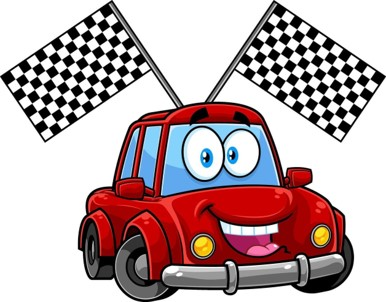


*Remember to upload the dataset to Google Colab!*

If you are running the code locally, you can set your working directory using the following code:

```
import os

os.chdir('file_path')
```

In [ ]:
# Import the necessary packages
import pandas as pd

1. Import the dataset

In [ ]:
racing = pd.read_csv("RacingGameData.csv")

2. Obtain the variable names in the dataset

In [ ]:
list(racing)

3. Obtain the number of observations

In [ ]:
racing.shape[0]

4. Obtain the number of variables

In [ ]:
racing.shape[1]

5. Obtain the data types of each column

In [ ]:
racing.dtypes

Display the first 5 observations in the dataset




In [ ]:
racing.head()

Display the first 10 observations in the dataset

In [ ]:
racing.head(10)

6. Extract the column containing the racing tracks

In [ ]:
tracks = racing["Track"]
tracks

7. Show the unique values in the racing tracks column

In [ ]:
track_types = racing["Track"].unique()
track_types

8. Extract row 5 of the dataset

In [ ]:
racing.iloc[4]

9. Extract the 5th, 7th and 10th row of the dataset.

In [ ]:
racing.iloc[[4,6,9]]

10. Subset the data to only contain the races on the "OvalTrack"

In [ ]:
racing_oval = racing.loc[racing["Track"] == "OvalTrack", :]

11. Subset the data set to only contain the races on either the "StraightTrack" or the "OvalTrack"

In [ ]:
tr = ["StraightTrack", "OvalTrack"]
racing_oval_straight = racing.loc[racing["Track"].isin(tr), :]

12. Subset the data set to only contain the races on the "OvalTrack" and the car that had a "Bayes" engine

In [ ]:
racing_oval_bayes = racing.loc[(racing["Track"] == "OvalTrack") &
                               (racing["Engine"] == "Bayes"), :]

13. Sort the dataset by `TopSpeedReached` in ascending order

In [ ]:
racing_sorted = racing.sort_values(by=['TopSpeedReached'])

14. Sort the dataset by `TopSpeedReached` in ascending order and then by `FinishTime` in descending order.

In [ ]:
racing_sorted2 = racing.sort_values(by=['TopSpeedReached', 'FinishTime'],
                                    ascending=[True, False])

15. Remove the `TopSpeedReached` column

In [ ]:
racing_2 = racing.drop("TopSpeedReached", axis = 1)

16. Remove the last 10 observations

In [ ]:
racing_reduced = racing[:-10]

17. Create a new variable in the racing dataset called `CheckPoint1to2` which will contain the time it took to go from checkpoint 1 to checkpoint 2.

In [ ]:
racing["CheckPoint1to2"] = racing["CheckPoint2"] - racing["CheckPoint1"]

18. Create a new variable in the racing data set based on the `FinishTime` variable
* If FinishTime > 25, the new variable display "slow"
* If FinishTime <= 25, the new variable display "fast"

In [ ]:
def slow_fast(time):
    if time > 25:
        return "slow"
    else:
        return "fast"

In [ ]:
racing["Indicator"] = racing["FinishTime"].apply(slow_fast)

19. The variable `CheckPoint2_66` contains a 1 if checkpoint 2 was passed within the first 66% of the completed race time. It has a value of 1 if the second checkpoint was passed within the first 66% of the completed race time and a value of 0 if this is not the case.

Recode this variable to contain the words "yes" and "no"

In [ ]:
# Create a dictionary
to_replace = {1 : "Yes",
              0 : "No"}

racing["CheckPoint2_66"] = racing["CheckPoint2_66"].replace(to_replace)